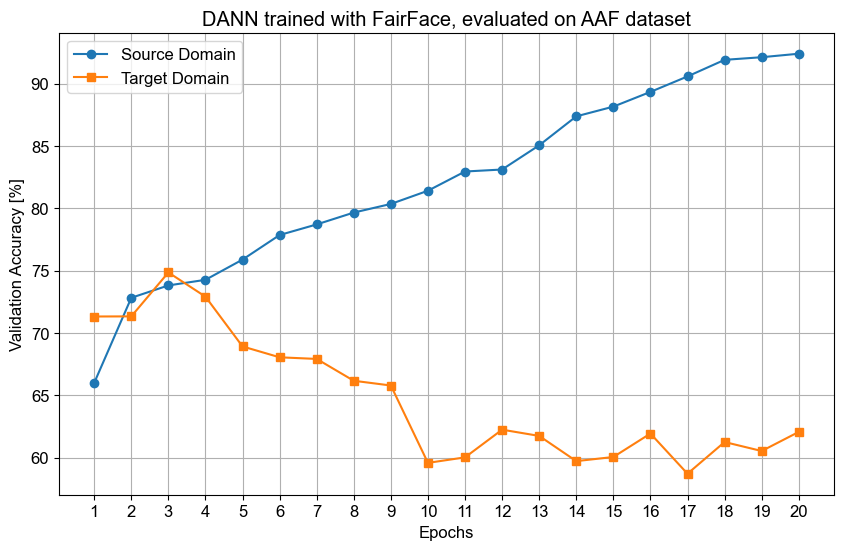

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Data for DANN UDA method
epochs = np.arange(1, 21)
task_acc = [0.6601, 0.7283, 0.7382, 0.7427, 0.7589, 0.7786, 0.7871, 0.7966, 0.8035, 0.8141, 
            0.8295, 0.8311, 0.8505, 0.8737, 0.8815, 0.8933, 0.9057, 0.9190, 0.9211, 0.9239]
domain_acc = [0.7133, 0.7134, 0.7486, 0.7292, 0.6893, 0.6806, 0.6793, 0.6618, 0.6580, 0.5960, 
              0.6004, 0.6226, 0.6176, 0.5974, 0.6007, 0.6195, 0.5873, 0.6127, 0.6055, 0.6208]

# Plotting
plt.figure(figsize=(10, 6))
# arial
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(task_acc, 100), label='Source Domain', marker='o')
plt.plot(epochs, np.dot(domain_acc, 100), label='Target Domain', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy [%]')
plt.title('DANN trained with FairFace, evaluated on AAF dataset')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
# save
plt.savefig('DANN_UDA_results.png')
plt.show()





Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


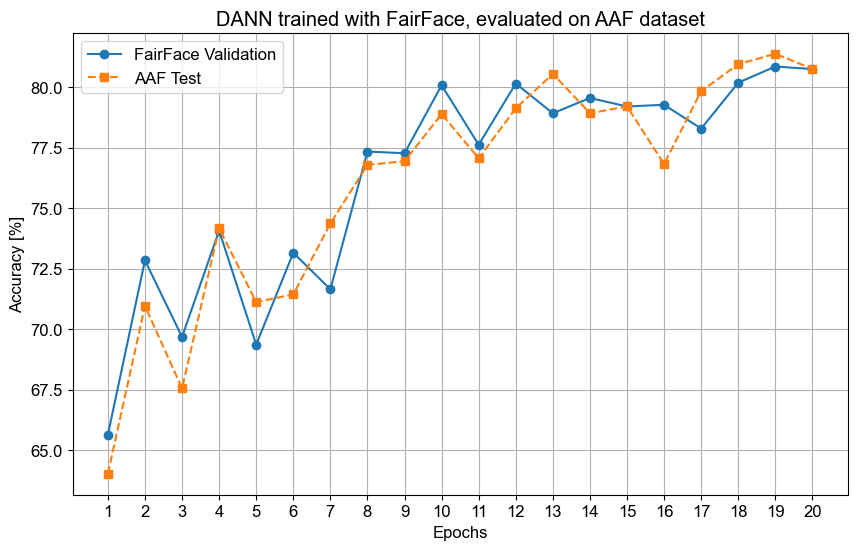

In [ ]:
results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/results_fairface_eval_dann.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/results_fairface_test_dann.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc, 100), label='FairFace Validation', marker='o')
plt.plot(epochs, np.dot(general_acc_test, 100), label='AAF Test', marker='s', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy [%]')
plt.title('DANN trained with FairFace, evaluated on AAF dataset')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
# save
plt.savefig('FairFace_DANN_UDA_results.png')
plt.show()




Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


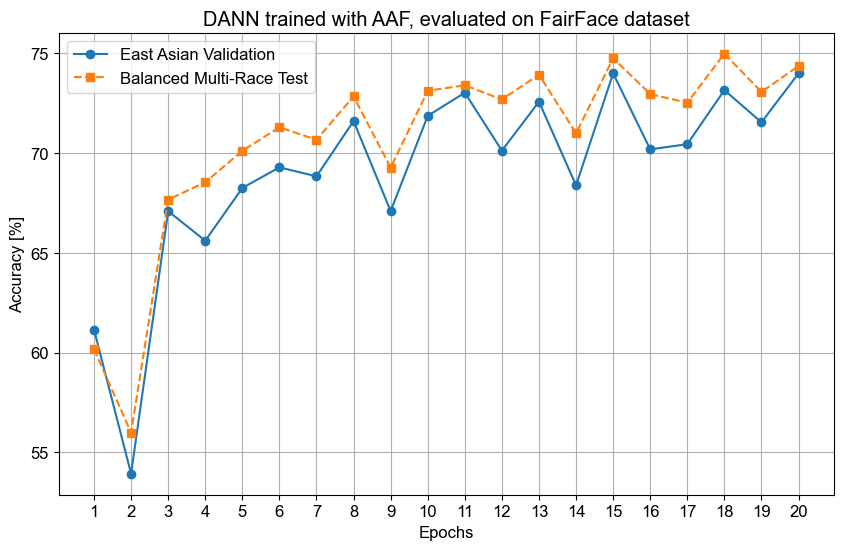

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_eval_results.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_test_results.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc, 100), label='East Asian Validation', marker='o')
plt.plot(epochs, np.dot(general_acc_test, 100), label='Balanced Multi-Race Test', marker='s', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy [%]')
plt.title('DANN trained with AAF, evaluated on FairFace dataset')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
# save
plt.savefig('AAF_DANN_UDA_results.png')
plt.show()





Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


<Figure size 1000x600 with 0 Axes>

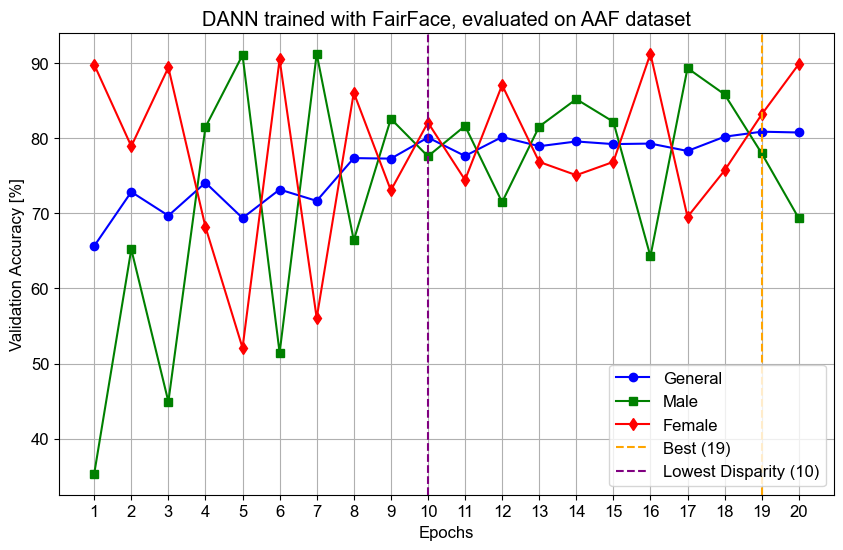

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/results_fairface_eval_dann.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/results_fairface_test_dann.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
difference_test = np.abs(np.array(male_acc_test) - np.array(female_acc_test))

# index of the lowest difference
best_iteration = np.argmin(difference) + 1
best_iteration_test = np.argmin(difference_test) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1
best_general_acc_test = np.argmax(general_acc_test) + 1


plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc, 100), marker='o', color = 'blue', label = 'General')
plt.plot(epochs, np.dot(male_acc, 100), label='Male', marker='s', color='green')
plt.plot(epochs, np.dot(female_acc, 100), label='Female', marker='d', color='red')
# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy [%]')
plt.title('DANN trained with FairFace, evaluated on AAF dataset')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
# save
plt.savefig('FairFace_VALIDATION_DANN_UDA_results_by_gender.png')
plt.show()


Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


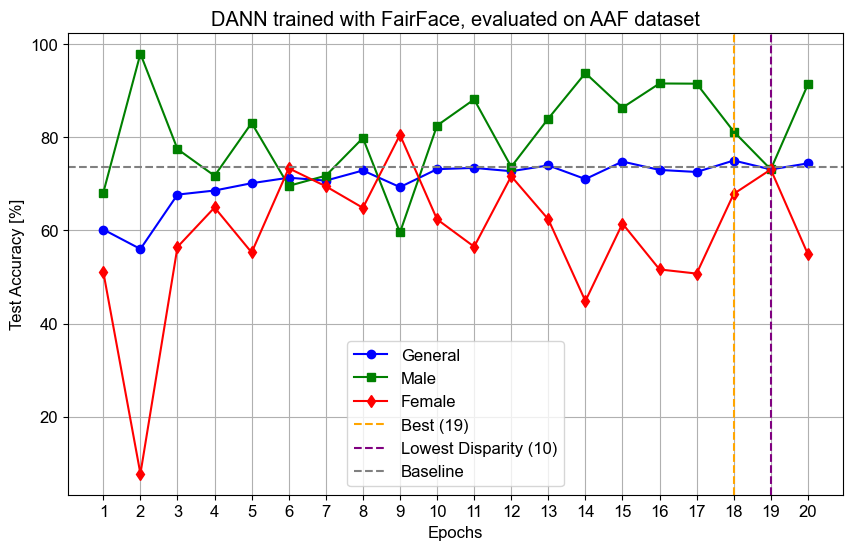

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/results_fairface_test_dann.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
difference_test = np.abs(np.array(male_acc_test) - np.array(female_acc_test))

# index of the lowest difference
best_iteration = np.argmin(difference) + 1
best_iteration_test = np.argmin(difference_test) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1
best_general_acc_test = np.argmax(general_acc_test) + 1


plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc_test, 100), label = 'General', marker='o', color = 'blue')
plt.plot(epochs, np.dot(male_acc_test, 100), label='Male', marker='s', color='green')
plt.plot(epochs, np.dot(female_acc_test, 100), label='Female', marker='d', color='red')
# Highlight the best iteration
plt.axvline(x=best_general_acc_test, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration_test, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
baseline = 73.65
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy [%]')
plt.title('DANN trained with FairFace, evaluated on AAF dataset')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
# save
plt.savefig('FairFace_TEST_DANN_UDA_results_by_gender.png')
plt.show()


Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


<Figure size 1000x600 with 0 Axes>

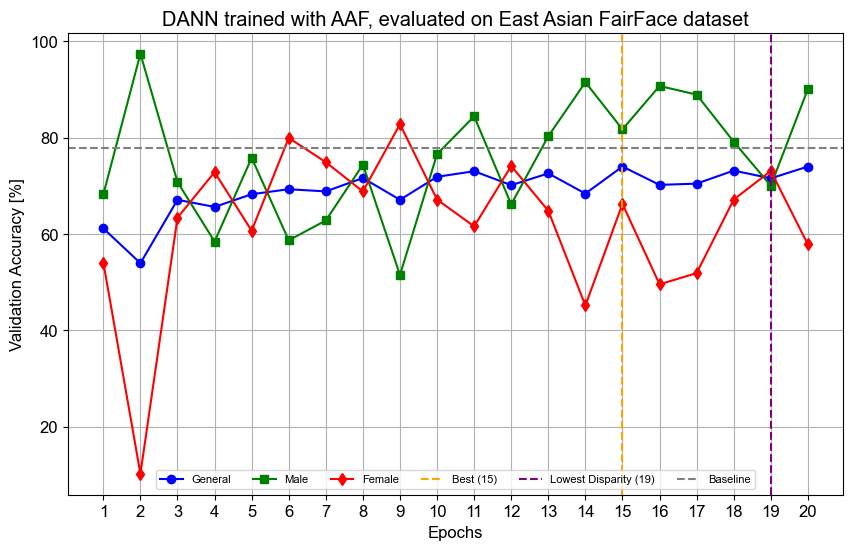

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_eval_results.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_test_results.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
difference_test = np.abs(np.array(male_acc_test) - np.array(female_acc_test))

# index of the lowest difference
best_iteration = np.argmin(difference) + 1
best_iteration_test = np.argmin(difference_test) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1
best_general_acc_test = np.argmax(general_acc_test) + 1


plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc, 100), label = 'General', marker='o', color = 'blue')
plt.plot(epochs, np.dot(male_acc, 100), label='Male', marker='s', color='green')
plt.plot(epochs, np.dot(female_acc, 100), label='Female', marker='d', color='red')
# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
baseline = 77.9355
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy [%]')
plt.title('DANN trained with AAF, evaluated on East Asian FairFace dataset')
plt.xticks(epochs)
# arial, font 8
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.legend(ncol=6)
plt.grid(True)
# save
plt.savefig('AAF_VALIDATION_DANN_UDA_results_by_gender.png')
plt.show()


Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


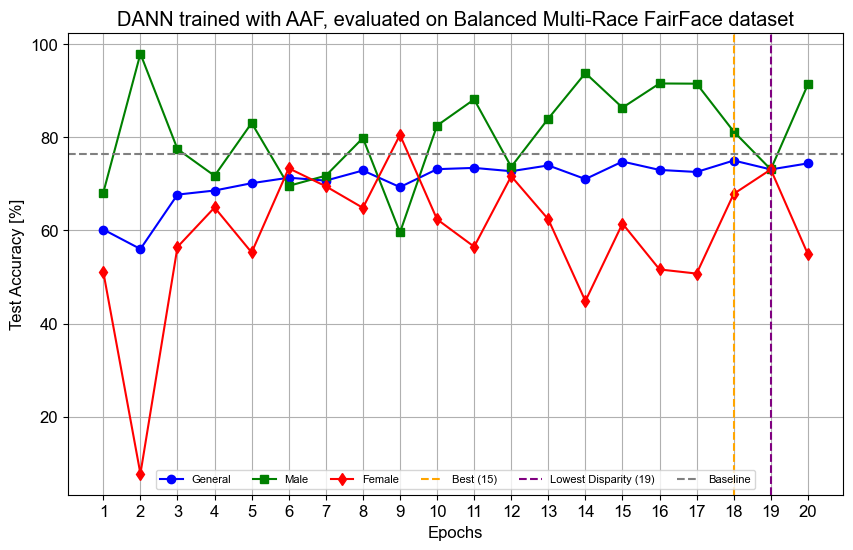

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_eval_results.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_test_results.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
difference_test = np.abs(np.array(male_acc_test) - np.array(female_acc_test))

# index of the lowest difference
best_iteration = np.argmin(difference) + 1
best_iteration_test = np.argmin(difference_test) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1
best_general_acc_test = np.argmax(general_acc_test) + 1


plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(general_acc_test, 100), label = 'General', marker='o', color = 'blue')
plt.plot(epochs, np.dot(male_acc_test, 100), label='Male', marker='s', color='green')
plt.plot(epochs, np.dot(female_acc_test, 100), label='Female', marker='d', color='red')
# Highlight the best iteration
plt.axvline(x=best_general_acc_test, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration_test, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
baseline = 76.4032
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy [%]')
plt.title('DANN trained with AAF, evaluated on Balanced Multi-Race FairFace dataset')
plt.xticks(epochs)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.legend(ncol=6)
plt.grid(True)
# save
plt.savefig('AAF_TEST_DANN_UDA_results_by_gender.png')
plt.show()


Index(['Epoch', 'Test Accuracy', 'Female Accuracy', 'Male Accuracy'], dtype='object')


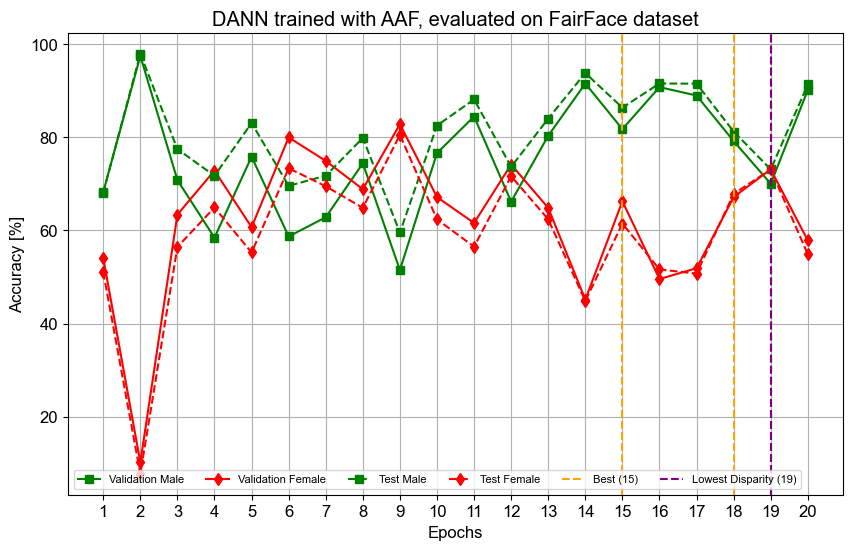

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_eval_results.csv')
test_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_dann_test_results.csv')
columns = results.columns
# Data for DANN UDA method
print(columns)
general_acc = results['Epoch']
female_acc = results['Test Accuracy']
male_acc = results['Female Accuracy']

general_acc_test = test_results['Epoch']
female_acc_test = test_results['Test Accuracy']
male_acc_test = test_results['Female Accuracy']
epochs = np.arange(1, 21)
# Plotting
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
difference_test = np.abs(np.array(male_acc_test) - np.array(female_acc_test))

# index of the lowest difference
best_iteration = np.argmin(difference) + 1
best_iteration_test = np.argmin(difference_test) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1
best_general_acc_test = np.argmax(general_acc_test) + 1


plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.plot(epochs, np.dot(male_acc, 100), label='Validation Male', marker='s', color='green')
plt.plot(epochs, np.dot(female_acc, 100), label='Validation Female', marker='d', color='red')
plt.plot(epochs, np.dot(100, male_acc_test), label = "Test Male", marker='s', color='green', linestyle = '--')
plt.plot(epochs, np.dot(100, female_acc_test),label = "Test Female",  marker='d', color='red', linestyle = '--')
# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
plt.axvline(x=best_general_acc_test, color='orange', linestyle='--')
plt.axvline(x=best_iteration_test, color='purple', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy [%]')
plt.title('DANN trained with AAF, evaluated on FairFace dataset')
plt.xticks(epochs)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.legend(ncol=6)
plt.grid(True)
# save
plt.savefig('AAF_DANN_UDA_results_by_gender.png')
plt.show()


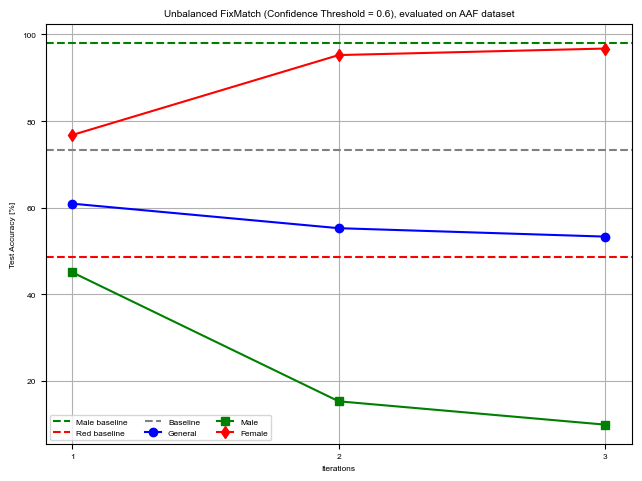

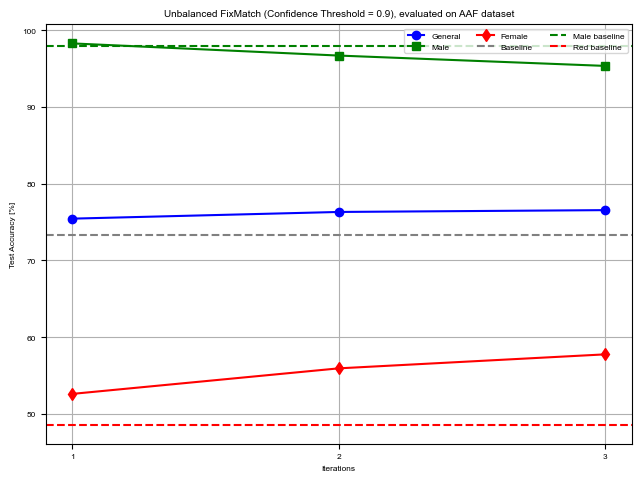

In [15]:
# Data for Unbalanced Dataset with Confidence Threshold of 0.6
iterations_06 = np.arange(1, 4)
general_acc_06 = [60.9350, 55.2694, 53.3281]
male_acc_06 = [45.0872, 15.2932, 9.9049]
female_acc_06 = [76.7829, 95.2456, 96.7512]

# Data for Unbalanced Dataset with Confidence Threshold of 0.9
iterations_09 = np.arange(1, 4)
general_acc_09 = [75.4358, 76.3074, 76.5452]
male_acc_09 = [98.2567, 96.6719, 95.3249]
female_acc_09 = [52.6149, 55.9429, 57.7655]


# arial
plt.rcParams['font.family'] = 'Arial'


plt.figure()

# baseline = 73.65
baseline = 73.28
male_baseline = 97.94
female_baseline = 48.61
plt.axhline(y=male_baseline, color='green', linestyle='--', label = 'Male baseline')
plt.axhline(y=female_baseline, color='red', linestyle='--', label = 'Red baseline')
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')
plt.plot(iterations_06, general_acc_06, label='General', marker='o', color='blue')
plt.plot(iterations_06, male_acc_06, label='Male', marker='s', color='green')
plt.plot(iterations_06, female_acc_06, label='Female', marker='d', color='red')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.xticks(iterations_06)
plt.title('Unbalanced FixMatch (Confidence Threshold = 0.6), evaluated on AAF dataset')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.legend(ncol=3)
plt.grid(True)
plt.tight_layout()
# save
plt.savefig('Unbalanced_Data_0.6.png')
plt.show()

# Subplot 2: Confidence Threshold of 0.9
plt.figure()
plt.plot(iterations_09, general_acc_09, label='General', marker='o', color='blue')
plt.plot(iterations_09, male_acc_09, label='Male', marker='s', color='green')
plt.plot(iterations_09, female_acc_09, label='Female', marker='d', color='red')

plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
# baseline = 73.65
baseline = 73.28
male_baseline = 97.94
female_baseline = 48.61
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')
plt.axhline(y=male_baseline, color='green', linestyle='--', label = 'Male baseline')
plt.axhline(y=female_baseline, color='red', linestyle='--', label = 'Red baseline')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.legend(ncol=3)
plt.grid(True)
plt.title('Unbalanced FixMatch (Confidence Threshold = 0.9), evaluated on AAF dataset')
plt.xticks(iterations_09)


plt.tight_layout()
# save
plt.savefig('Unbalanced_Data_0.9.png')
plt.show()


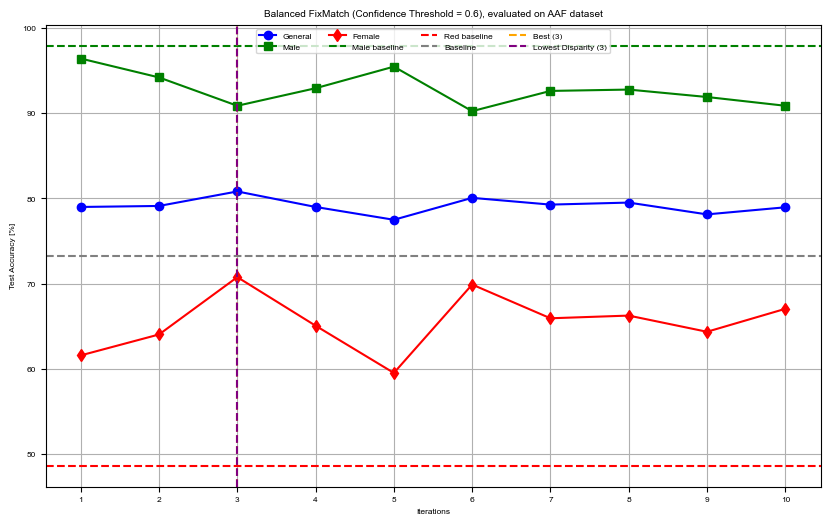

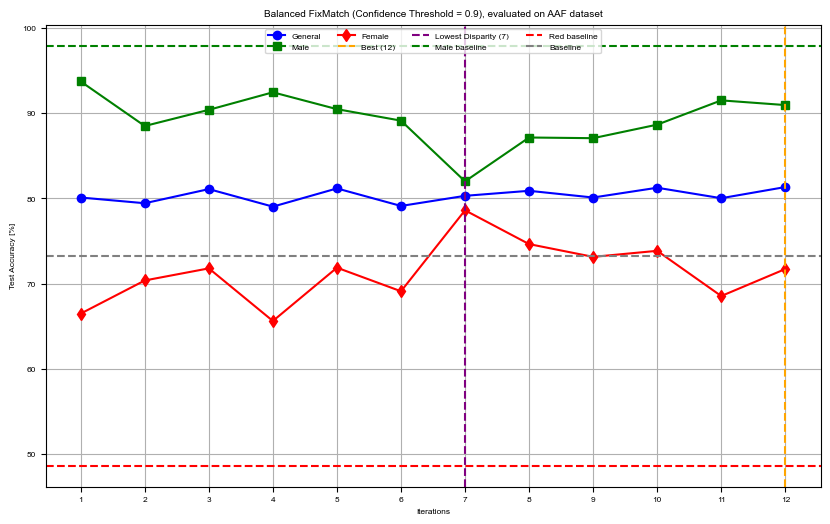

In [17]:
# Data for Balanced Data with Confidence Threshold of 0.6
import numpy as np
import matplotlib.pyplot as plt
# arial
plt.rcParams['font.family'] = 'Arial'

iterations = np.arange(1, 11)
general_acc = [79.0016, 79.1204, 80.8241, 79.0016, 77.4960, 80.0713, 79.2789, 79.5166, 78.1300, 78.9620]
male_acc = [96.4342, 94.2155, 90.8875, 92.9477, 95.4834, 90.2536, 92.6307, 92.7892, 91.9176, 90.8875]
female_acc = [61.5689, 64.0254, 70.7607, 65.0555, 59.5087, 69.8891, 65.9271, 66.2441, 64.3423, 67.0365]
plt.figure(figsize=(10, 6))
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = 3

# Plotting
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')


# Highlight the best iteration
# Highlight the best iteration
# plot baseline
baseline = 73.28
male_baseline = 97.94
female_baseline = 48.61
plt.axhline(y=male_baseline, color='green', linestyle='--', label = 'Male baseline')
plt.axhline(y=female_baseline, color='red', linestyle='--', label = 'Red baseline')
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.6), evaluated on AAF dataset')
# put legend at y = 110 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('Balanced_Data_with_Confidence_Threshold_of_0.6.png')
plt.show()

# Data for Balanced Data with Confidence Threshold of 0.9
iterations = np.arange(1, 13)
general_acc = [80.11, 79.44, 81.10, 79.04, 81.18, 79.12, 80.31, 80.90,  80.11, 81.26, 80.03, 81.34]
male_acc = [93.74, 88.51, 90.41, 92.47, 90.49, 89.14, 82.01, 87.16, 87.08, 88.67, 91.52, 90.97]
female_acc = [66.48, 70.37, 71.79, 65.61, 71.87, 69.10, 78.61, 74.64, 73.14, 73.85, 68.54, 71.71]

difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1

# Highlight the best accuracy iteration
best_general_acc = 12
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')

# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')

# plot baseline
baseline = 73.28
male_baseline = 97.94
female_baseline = 48.61
plt.axhline(y=male_baseline, color='green', linestyle='--', label = 'Male baseline')
plt.axhline(y=female_baseline, color='red', linestyle='--', label = 'Red baseline')
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.9), evaluated on AAF dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)


plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('Balanced_Data_with_Confidence_Threshold_of_0.9.png')
plt.show()



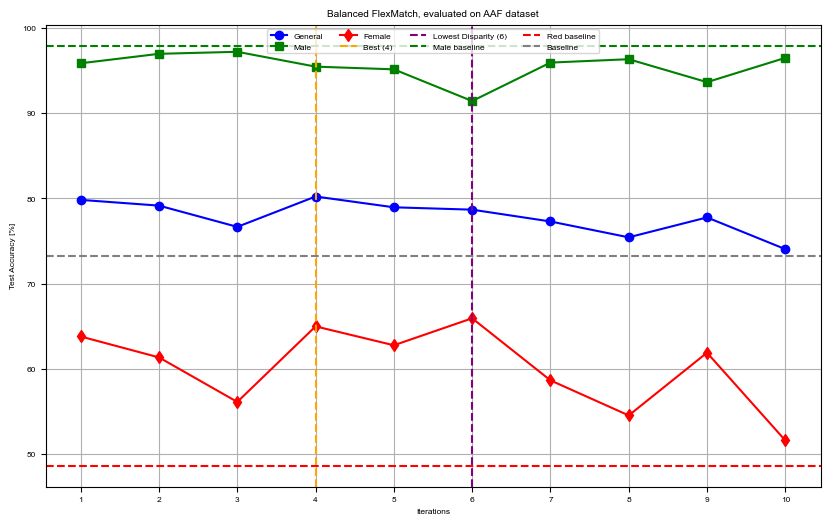

In [18]:
# Data for FlexMatch with Balanced Data
iterations = np.arange(1, 11)
general_acc = [79.8336, 79.1601, 76.6640, 80.2298, 78.9620, 78.6846, 77.2979, 75.4358, 77.7734, 74.0491]
male_acc = [95.8796, 96.9889, 97.2266, 95.4834, 95.1664, 91.4422, 95.9588, 96.3550, 93.6609, 96.5135]
female_acc = [63.7876, 61.3312, 56.1014, 64.9762, 62.7575, 65.9271, 58.6371, 54.5166, 61.8859, 51.5848]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')


difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = 4
# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
# plot baseline
baseline = 73.28
male_baseline = 97.94
female_baseline = 48.61
plt.axhline(y=male_baseline, color='green', linestyle='--', label = 'Male baseline')
plt.axhline(y=female_baseline, color='red', linestyle='--', label = 'Red baseline')
plt.axhline(y=baseline, color='gray', linestyle='--', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FlexMatch, evaluated on AAF dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('FlexMatch_with_Balanced_Data.png')
plt.show()


## AAF BALANCED TEST AND VALIDATION 0.6 and 0.9 FixMatch

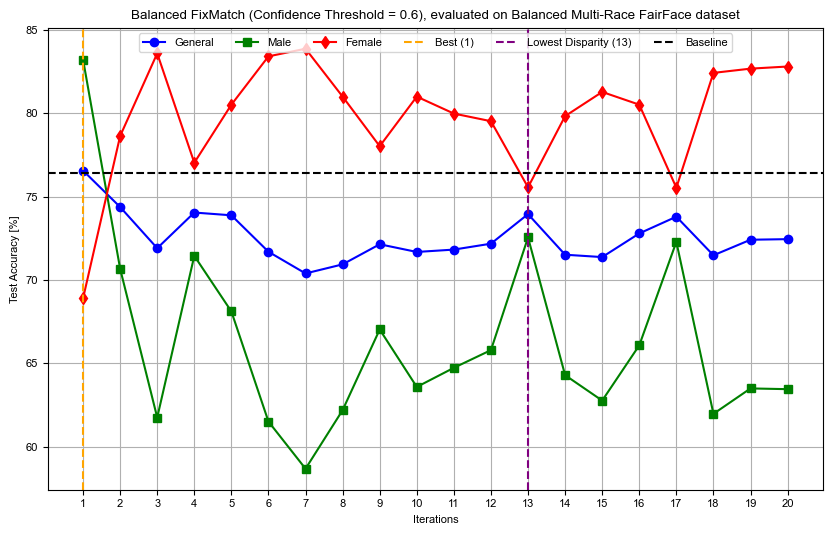

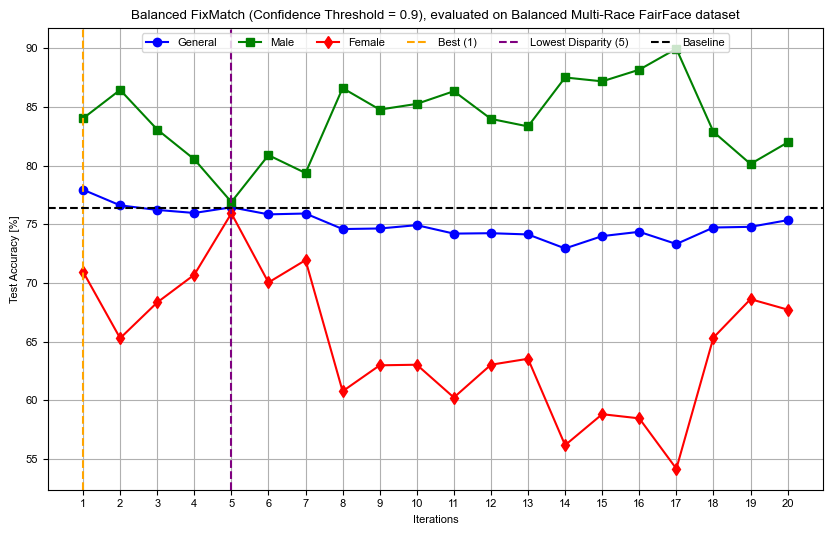

In [24]:
# Data for Balanced Data with Confidence Threshold of 0.6
import numpy as np
import matplotlib.pyplot as plt
import re
# arial
plt.rcParams['font.family'] = 'Arial'

aaf_06_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_0.6_test_results.csv')
aaf_09_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_0.9_test_results.csv')
aaf_06_results["Accuracy"] = aaf_06_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
aaf_09_results["Accuracy"] = aaf_09_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
general_acc = aaf_06_results['Accuracy']
male_acc = aaf_06_results['Male Accuracy']
female_acc = aaf_06_results['Female Accuracy']
iterations = aaf_06_results['Iteration']

plt.figure(figsize=(10, 6))
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Plotting
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')

# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
# baseline
baseline = 76.4032
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.6), evaluated on Balanced Multi-Race FairFace dataset')
# put legend at y = 110 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_Test_Balanced_Data_with_Confidence_Threshold_of_0.6.png')
plt.show()

# Data for Balanced Data with Confidence Threshold of 0.9
general_acc = aaf_09_results['Accuracy']
male_acc = aaf_09_results['Male Accuracy']
female_acc = aaf_09_results['Female Accuracy']



difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1

# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')

# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
baseline = 76.4032
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.9), evaluated on Balanced Multi-Race FairFace dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)


plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_Test_Balanced_Data_with_Confidence_Threshold_of_0.9.png')
plt.show()


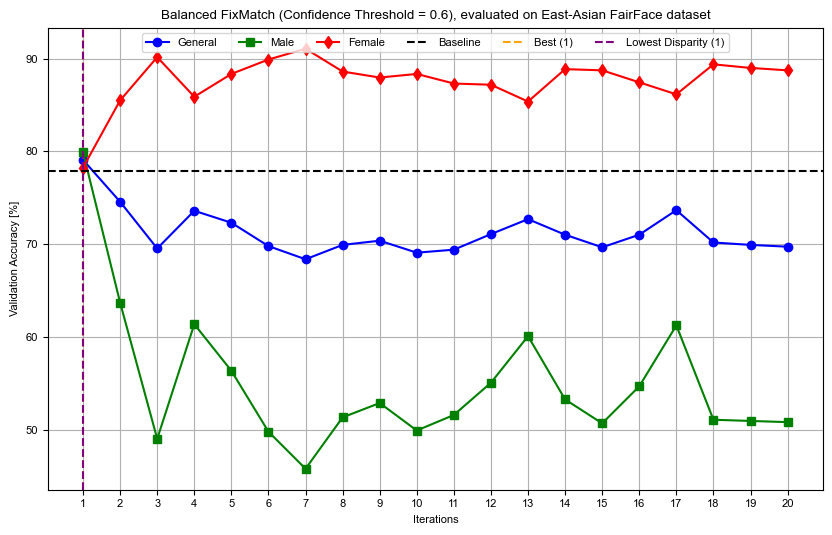

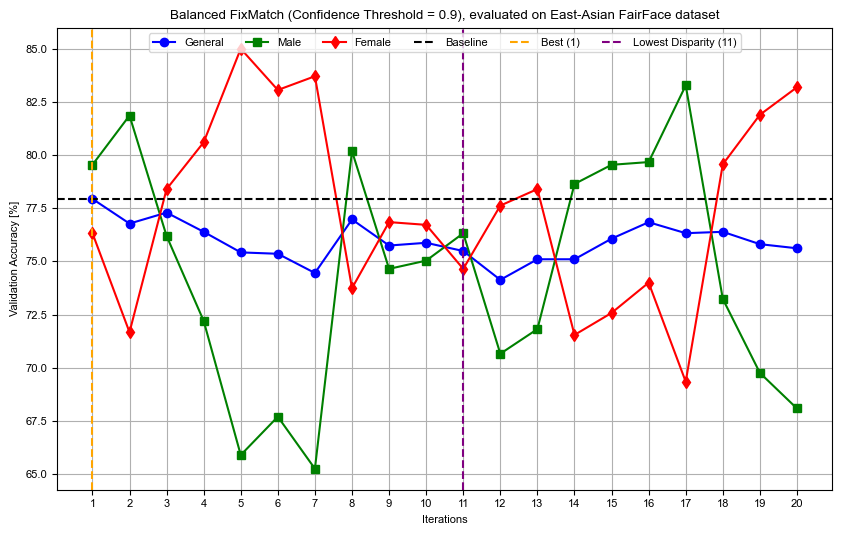

In [26]:
# Data for Balanced Data with Confidence Threshold of 0.6
import numpy as np
import matplotlib.pyplot as plt
import re
# arial
plt.rcParams['font.family'] = 'Arial'

aaf_06_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_0.6_validation_results.csv')
aaf_09_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_0.9_validation_results.csv')
aaf_06_results["Accuracy"] = aaf_06_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
aaf_09_results["Accuracy"] = aaf_09_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
general_acc = aaf_06_results['Accuracy']
male_acc = aaf_06_results['Male Accuracy']
female_acc = aaf_06_results['Female Accuracy']
iterations = aaf_06_results['Iteration']

plt.figure(figsize=(10, 6))
# Highlight the best iteration
difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Plotting
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')

# Highlight the best iteration
baseline = 77.9355
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.6), evaluated on East-Asian FairFace dataset')
# put legend at y = 110 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_VAL_Balanced_Data_with_Confidence_Threshold_of_0.6.png')
plt.show()

# Data for Balanced Data with Confidence Threshold of 0.9
general_acc = aaf_09_results['Accuracy']
male_acc = aaf_09_results['Male Accuracy']
female_acc = aaf_09_results['Female Accuracy']



difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1

# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')
baseline = 77.9355
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')

plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy [%]')
plt.title('Balanced FixMatch (Confidence Threshold = 0.9), evaluated on East-Asian FairFace dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)


plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_VAL_Balanced_Data_with_Confidence_Threshold_of_0.9.png')
plt.show()

## AAF FlexMatch

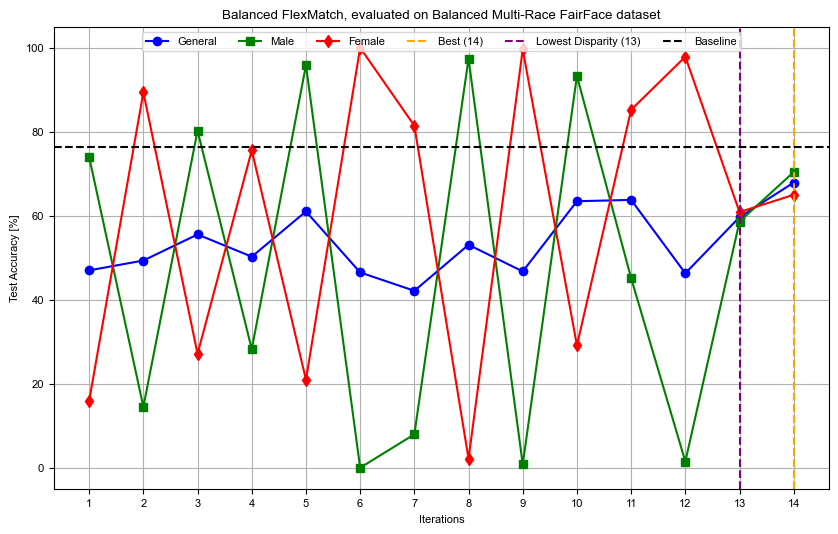

In [27]:
# Data for FlexMatch with Balanced Data
import numpy as np
import matplotlib.pyplot as plt
# arial
plt.rcParams['font.family'] = 'Arial'

aaf_flexmatch_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_flexmatch_test_results.csv')

aaf_flexmatch_results["Accuracy"] = aaf_flexmatch_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
general_acc = aaf_flexmatch_results['Accuracy']
male_acc = aaf_flexmatch_results['Male Accuracy']
female_acc = aaf_flexmatch_results['Female Accuracy']
iterations = aaf_flexmatch_results['Iteration']


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')


difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')

plt.xlabel('Iterations')
baseline = 76.4032
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
plt.ylabel('Test Accuracy [%]')
plt.title('Balanced FlexMatch, evaluated on Balanced Multi-Race FairFace dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_Test_FlexMatch_with_Balanced_Data.png')
plt.show()



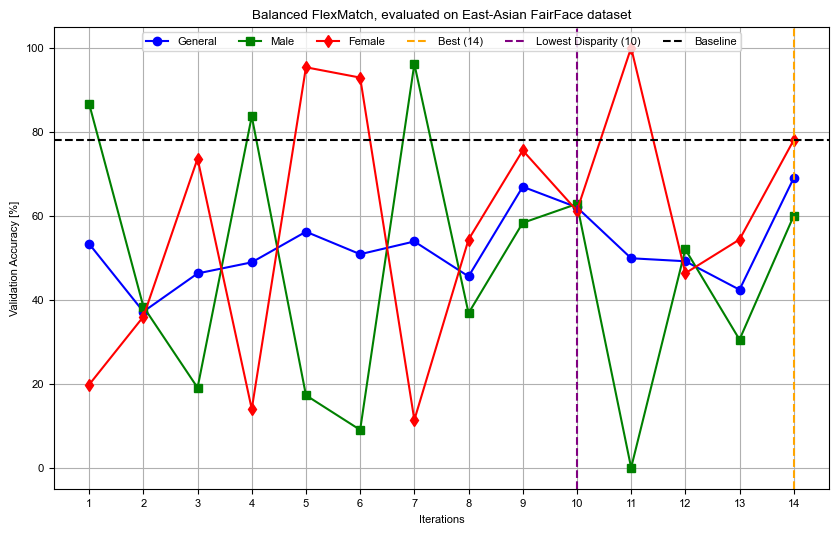

In [28]:
# Data for FlexMatch with Balanced Data
import numpy as np
import matplotlib.pyplot as plt
# arial
plt.rcParams['font.family'] = 'Arial'

aaf_flexmatch_results = pd.read_csv('../AAF-Dataset-Pseudo-Labeling-UDA/aaf_flexmatch_validation_results.csv')
aaf_flexmatch_results["Accuracy"] = aaf_flexmatch_results["Accuracy"].apply(lambda x: float(re.search(r"([\d.]+)", x).group(1)))
general_acc = aaf_flexmatch_results['Accuracy']
male_acc = aaf_flexmatch_results['Male Accuracy']
female_acc = aaf_flexmatch_results['Female Accuracy']
iterations = aaf_flexmatch_results['Iteration']


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, general_acc, label='General', marker='o', color='blue')
plt.plot(iterations, male_acc, label='Male', marker='s', color='green')
plt.plot(iterations, female_acc, label='Female', marker='d', color='red')


difference = np.abs(np.array(male_acc) - np.array(female_acc))
# index of the lowest difference
best_iteration = np.argmin(difference) + 1
# Highlight the best accuracy iteration
best_general_acc = np.argmax(general_acc) + 1

# Highlight the best iteration
plt.axvline(x=best_general_acc, color='orange', linestyle='--', label=f'Best ({best_general_acc})')
plt.axvline(x=best_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_iteration})')
baseline = 77.9355
plt.axhline(y=baseline, color='black', linestyle='--', label='Baseline')
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy [%]')
plt.title('Balanced FlexMatch, evaluated on East-Asian FairFace dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)

plt.grid(True)
plt.xticks(iterations)
# save
plt.savefig('AAF_Validation_FlexMatch_with_Balanced_Data.png')
plt.show()

## RESULTS BY RACE - FAIRFACE EVALUATION

# Self-Iterative Training using FixMatch, FlexMatch

FixMatch
asian_faces_0.9_5_balanced_best.pth # best test accuracy, asian_faces_0.9_1_balanced_best.pth # best overall accuracy, asian_faces_0.9_11_balanced_best.pth  # best validation gender disparity, asian_faces_0.6_13_balanced_best.pth # best test gender disparity , asian_faces_0.6_1_balanced_best.pth # best overall accuracy, best validation gender disparity 
FlexMatch
asian_faces_FlexMatch_{i}_best.pth, 10 (best validation gender disparity), 13 (best test gender disparity), 14 (best overall accuracy, both)
DANN
epoch 18 (best test overall accuracy), epoch 19 (best test gender disparity), epoch 15 (best validation overall accuracy), epoch 19 (best validation gender disparity)



0       NaN
1       NaN
2       NaN
3       1.0
4       1.0
       ... 
296    18.0
297    19.0
298    19.0
299    20.0
300    20.0
Name: Iteration, Length: 301, dtype: float64


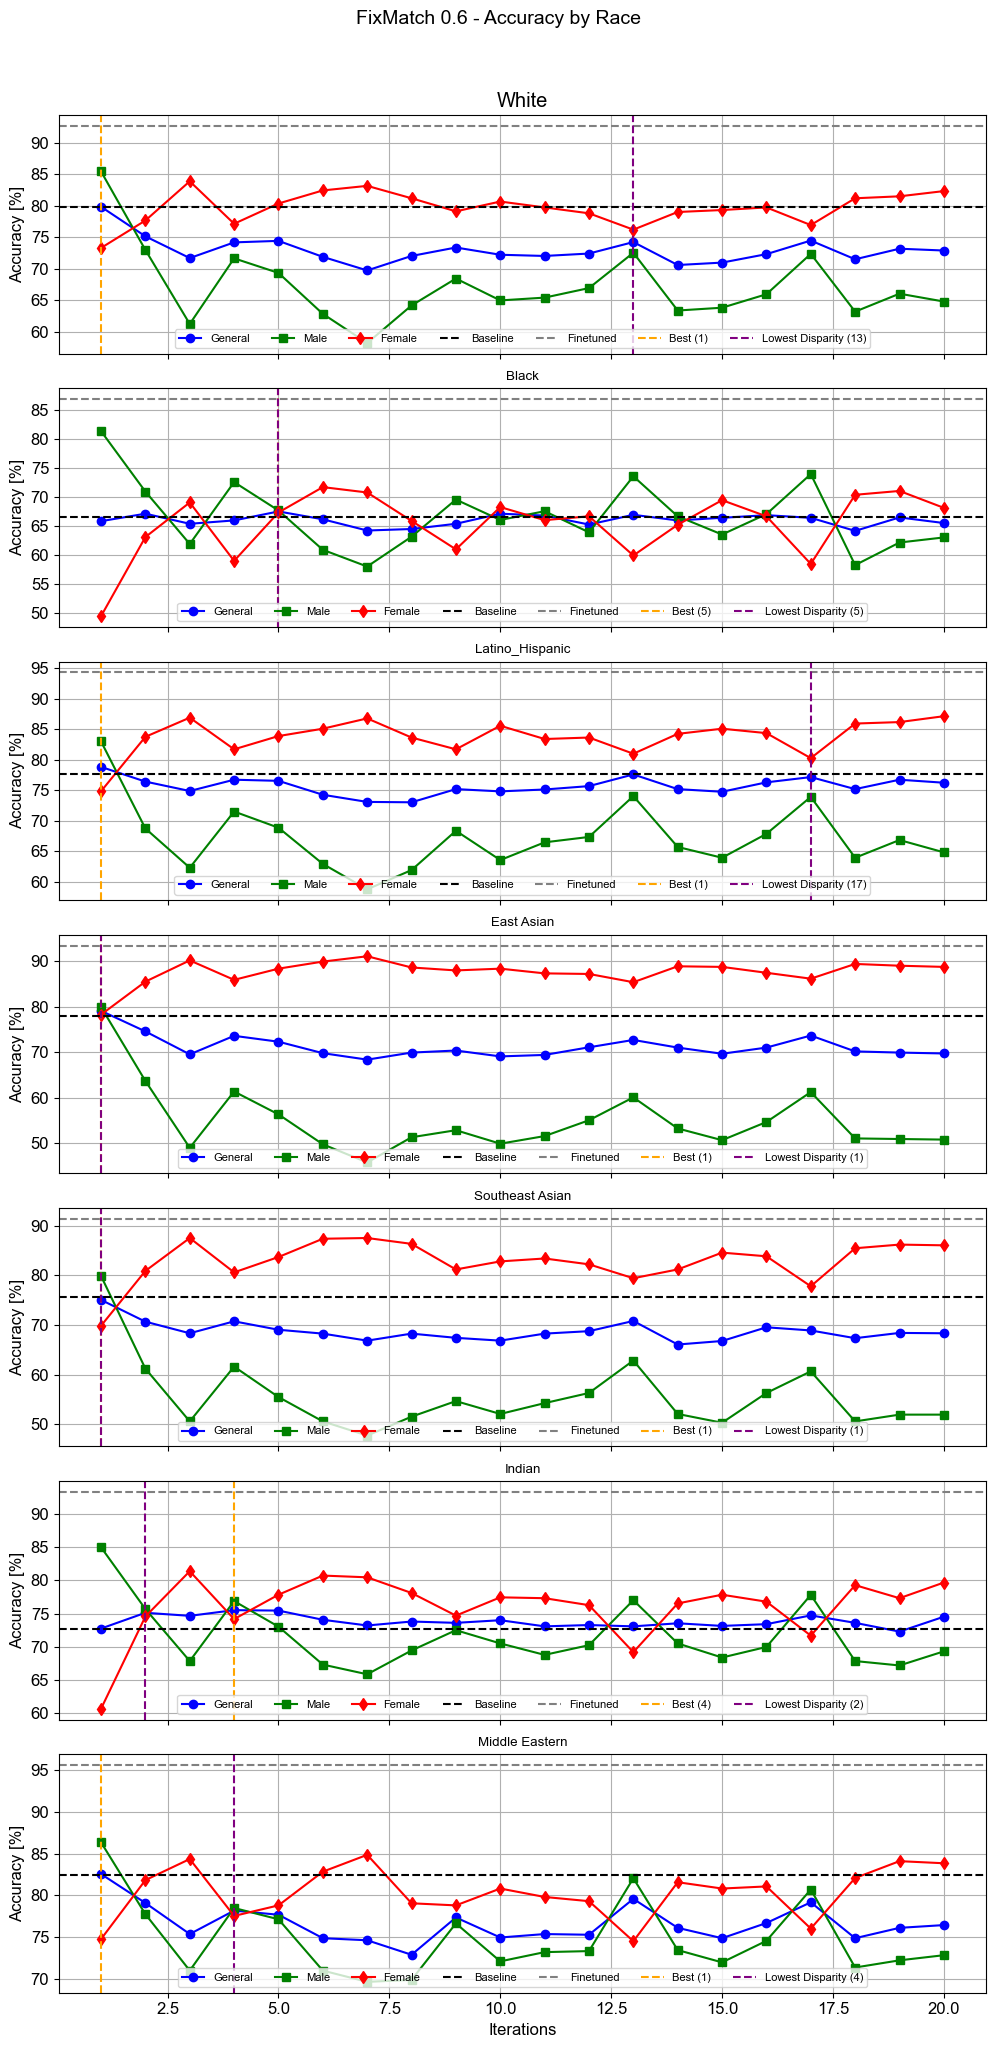

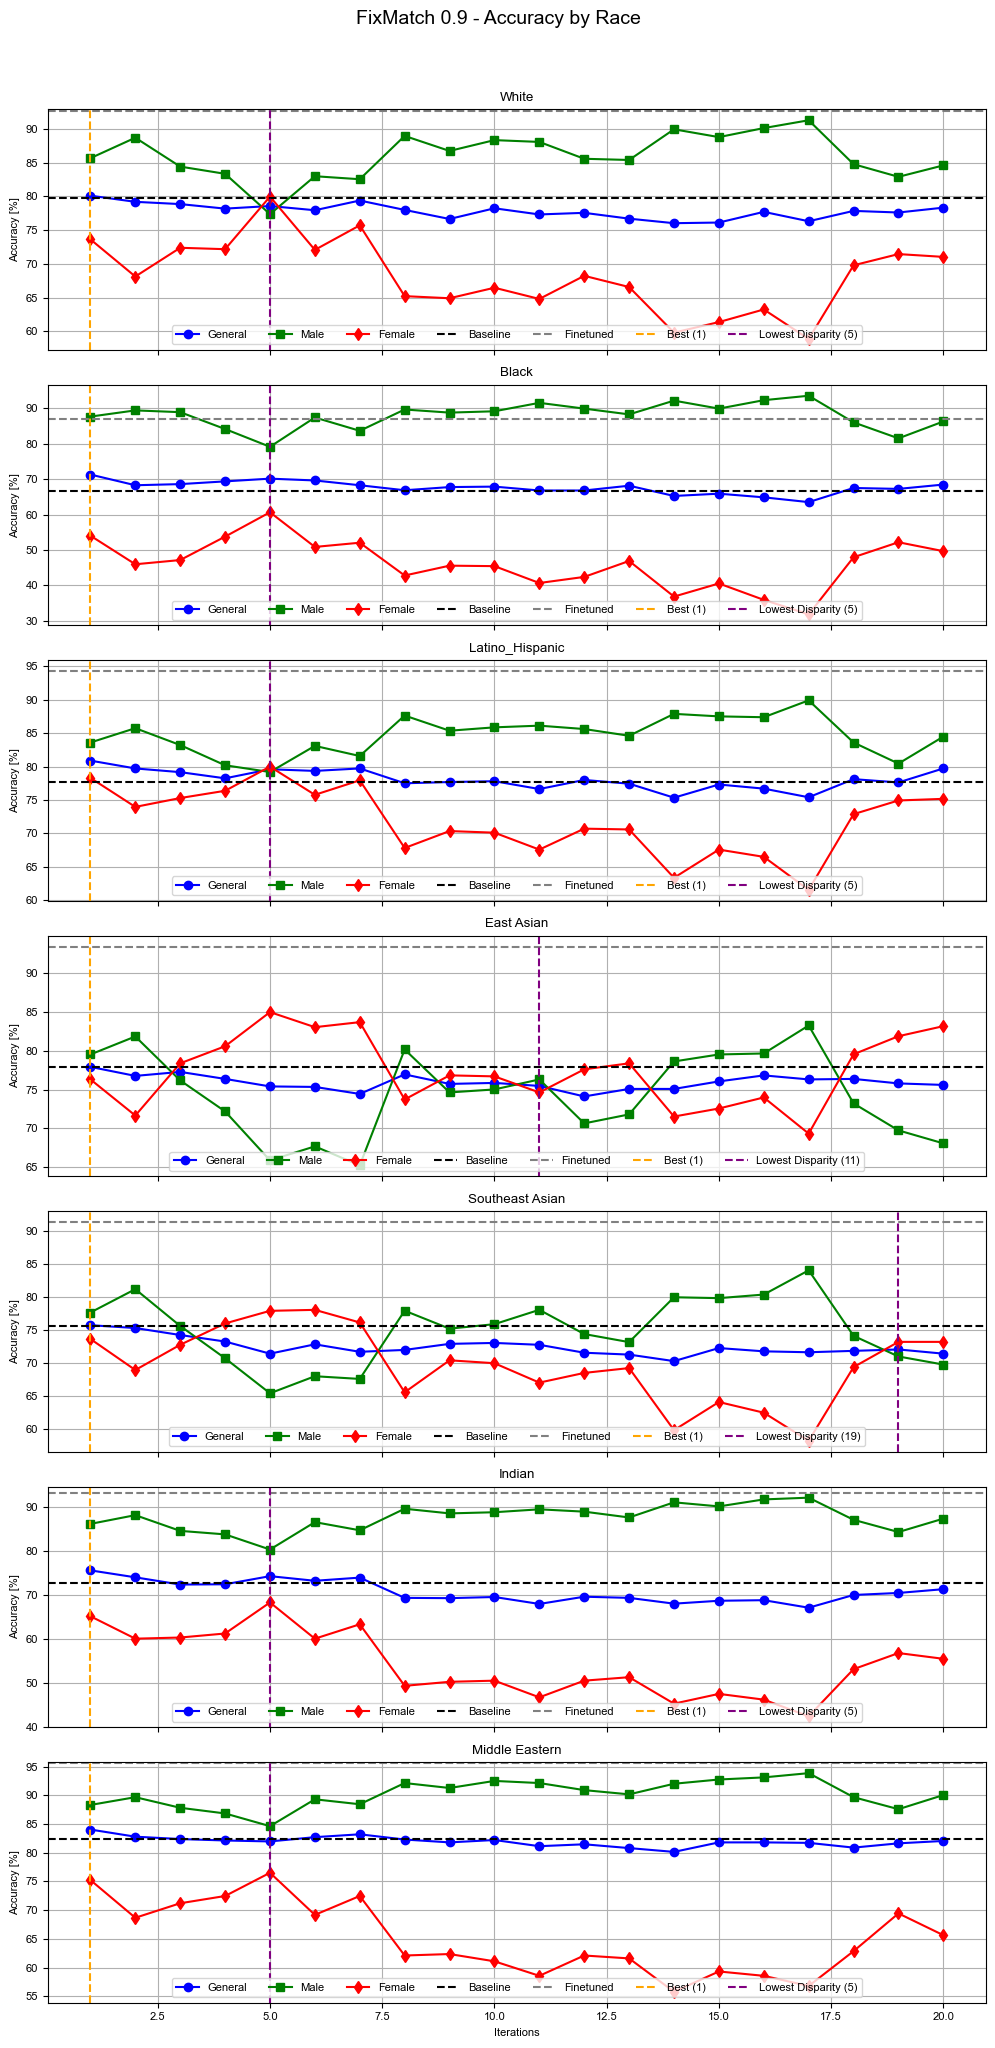

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


# Load the results
df = pd.read_csv("../AAF-Dataset-Pseudo-Labeling-UDA/all_races_validation_results.csv")
# Convert 'Accuracy', 'Male Accuracy', and 'Female Accuracy' to numeric values
df['Accuracy'] = df['Accuracy'].apply(lambda x: float(x.split('(')[1].split(',')[0]))
df['Male Accuracy'] = df['Male Accuracy'].apply(lambda x: float(x))
df['Female Accuracy'] = df['Female Accuracy'].apply(lambda x: float(x))

# Extract iteration number from model names for iterative models
# Define a regex pattern that matches the iteration number (i)
pattern = re.compile(r"asian_faces_(?:FlexMatch|0\.\d+)_((?:[1-9]|1\d|20))_")

# Function to extract iteration number from a filename string
def extract_iteration(filename):
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the extraction function to the Filename column
df['Iteration'] = df['Model'].apply(extract_iteration)

# Filter for iterative models
fixmatch_06 = df[df['Model'].str.contains('asian_faces_0.6')]
fixmatch_09 = df[df['Model'].str.contains('asian_faces_0.9')]
print(df['Iteration'])
# Other models (baseline and fine-tuned)
other_models = df[~df['Model'].str.contains('asian_faces_')]

# List of races
races = ["White", "Black", "Latino_Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]

# Create subplots for each model
models = {
    "FixMatch 0.6": fixmatch_06,
    "FixMatch 0.9": fixmatch_09,
}

# Plot settings
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Iterate over each model
for model_name, model_data in models.items():
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20), sharex=True)
    fig.suptitle(f"{model_name} - Accuracy by Race", y=1.02, fontsize=14)
    for ax, race in zip(axes, races):
        # Filter data for the current race
        # only plot model data for the current race
        race_data = model_data[model_data['Race'] == race]
        ax.plot(race_data['Iteration'], race_data["Accuracy"], label='General', marker='o', color='blue')
        ax.plot(race_data['Iteration'], race_data[f'Male Accuracy'], label='Male', marker='s', color='green')
        ax.plot(race_data['Iteration'], race_data[f'Female Accuracy'], label='Female', marker='d', color='red')

        # Add horizontal lines for baseline and fine-tuned models
        baseline_accuracy = other_models[(other_models['Model'] == 'classification_model.pth') & (other_models['Race'] == race)]["Accuracy"].values[0]
        finetuned_accuracy = other_models[(other_models['Model'] == '../5epoch_fairface.pth') & (other_models['Race'] == race)]["Accuracy"].values[0]
        ax.axhline(y=baseline_accuracy, color='black', linestyle='--', label='Baseline')
        ax.axhline(y=finetuned_accuracy, color='gray', linestyle='--', label='Finetuned')

        # Highlight the best iteration (highest overall accuracy)
        best_iteration = int(race_data['Iteration'].iloc[np.argmax(race_data["Accuracy"])])
        ax.axvline(x=best_iteration, color='orange', linestyle='--', label=f'Best ({best_iteration})')

        # Highlight the iteration with the lowest gender disparity
        disparity = np.abs(race_data['Male Accuracy'] - race_data['Female Accuracy'])
        best_disparity_iteration = int(race_data['Iteration'].iloc[np.argmin(disparity)])
        ax.axvline(x=best_disparity_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_disparity_iteration})')

        # Customize subplot
        ax.set_ylabel("Accuracy [%]")
        ax.set_title(f"{race}")
        plt.rcParams['font.size'] = 8
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=7)
        ax.grid(True)

    axes[-1].set_xlabel("Iterations")
    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_Accuracy_Over_Iterations.png", bbox_inches='tight')
    plt.show()



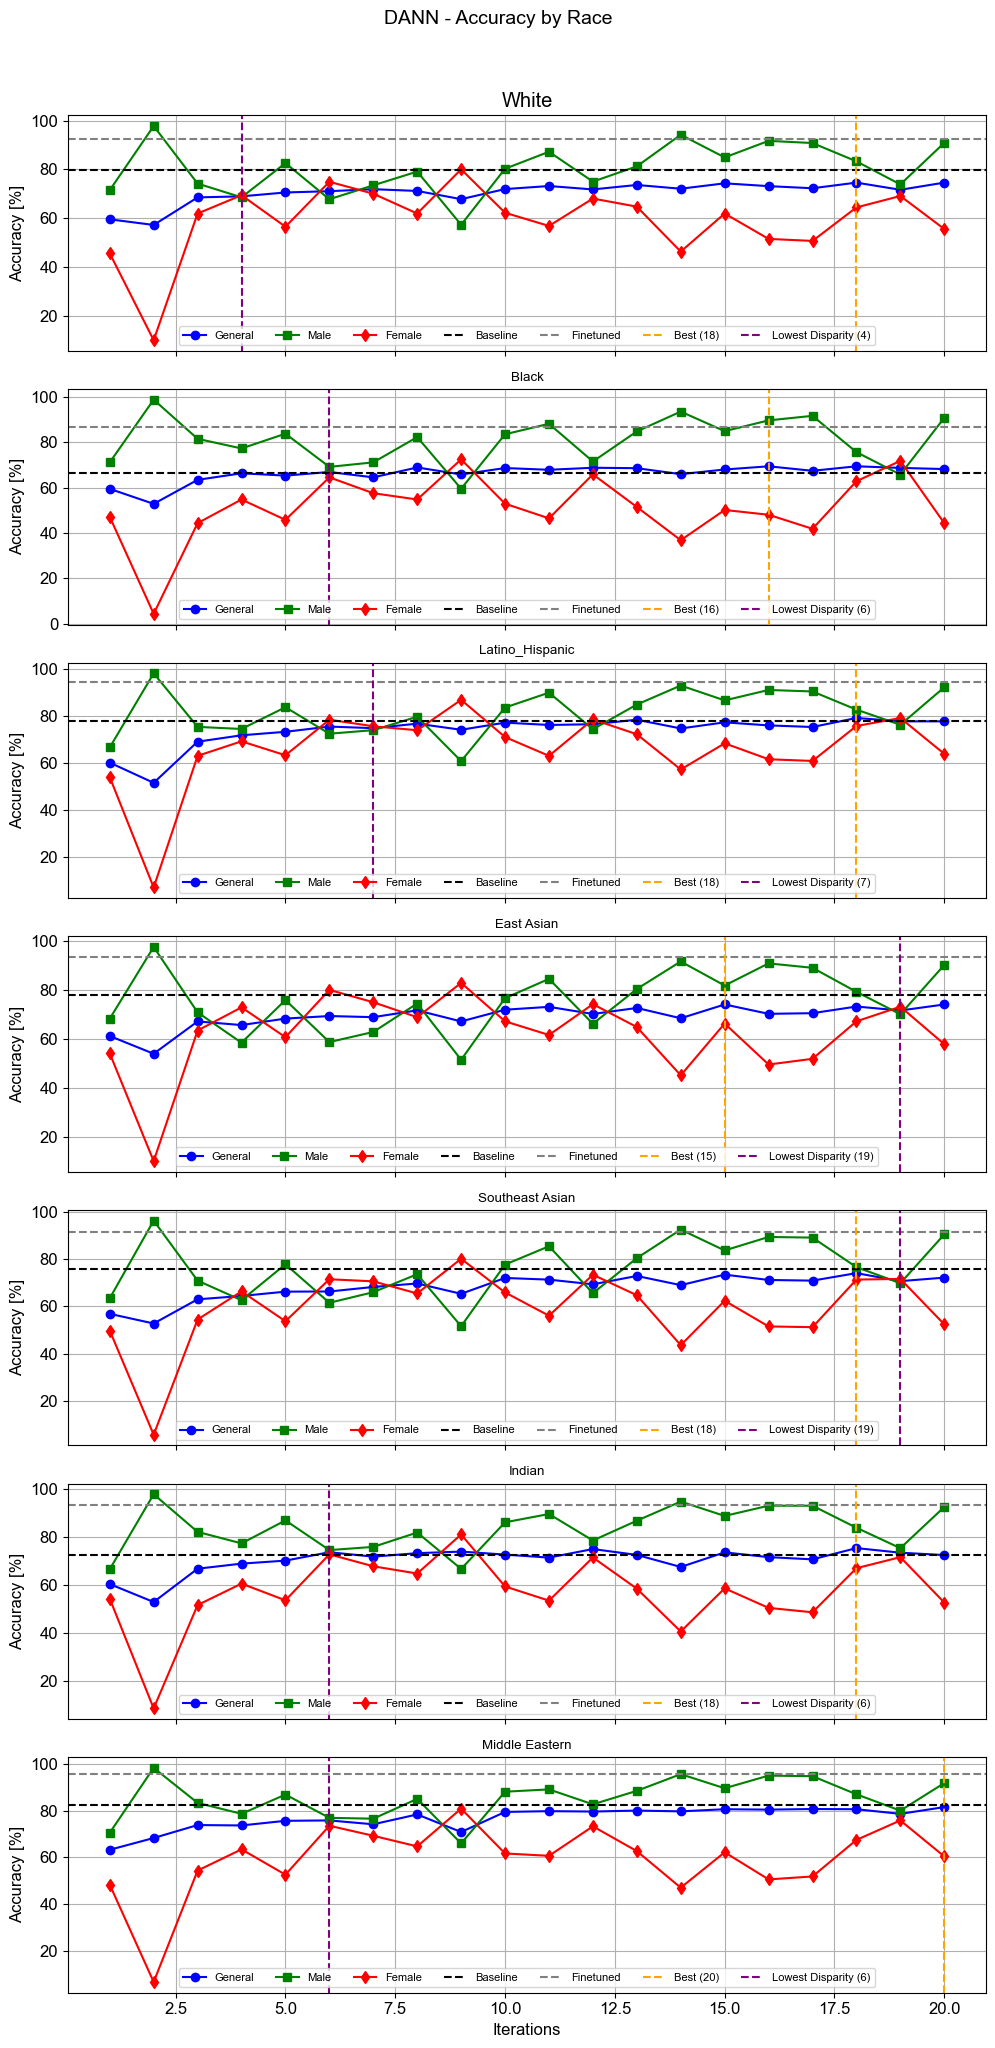

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


# Load the results
df = pd.read_csv("../AAF-Dataset-Pseudo-Labeling-UDA/all_races_dann_results.csv")
df2 = pd.read_csv("../AAF-Dataset-Pseudo-Labeling-UDA/all_races_validation_results.csv")
df2['Accuracy'] = df2['Accuracy'].apply(lambda x: float(x.split('(')[1].split(',')[0]))
df2['Male Accuracy'] = df2['Male Accuracy'].apply(lambda x: float(x))
df2['Female Accuracy'] = df2['Female Accuracy'].apply(lambda x: float(x))

# Convert 'Accuracy', 'Male Accuracy', and 'Female Accuracy' to numeric values
df['Accuracy'] = df['Accuracy'].apply(lambda x: float(x.split('(')[1].split(',')[0]))
df['Male Accuracy'] = df['Male Accuracy'].apply(lambda x: float(x))
df['Female Accuracy'] = df['Female Accuracy'].apply(lambda x: float(x))

# Apply the extraction function to the Filename column
# Other models (baseline and fine-tuned)
other_models = df2[~df2['Model'].str.contains('asian_faces_')]
# List of races
races = ["White", "Black", "Latino_Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]

# Create subplots for each model
df['Iteration'] = df['Epoch']
models = {
    "DANN": df}
# List of races
races = ["White", "Black", "Latino_Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]
# Plot settings
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Iterate over each model
for model_name, model_data in models.items():
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20), sharex=True)
    fig.suptitle(f"{model_name} - Accuracy by Race", y=1.02, fontsize=14)
    for ax, race in zip(axes, races):
        # Filter data for the current race
        # only plot model data for the current race
        race_data = model_data[model_data['Race'] == race]
        ax.plot(race_data['Iteration'], race_data["Accuracy"], label='General', marker='o', color='blue')
        ax.plot(race_data['Iteration'], race_data[f'Male Accuracy'], label='Male', marker='s', color='green')
        ax.plot(race_data['Iteration'], race_data[f'Female Accuracy'], label='Female', marker='d', color='red')

        # Add horizontal lines for baseline and fine-tuned models
        baseline_accuracy = other_models[(other_models['Model'] == 'classification_model.pth') & (other_models['Race'] == race)]["Accuracy"].values[0]
        finetuned_accuracy = other_models[(other_models['Model'] == '../5epoch_fairface.pth') & (other_models['Race'] == race)]["Accuracy"].values[0]
        ax.axhline(y=baseline_accuracy, color='black', linestyle='--', label='Baseline')
        ax.axhline(y=finetuned_accuracy, color='gray', linestyle='--', label='Finetuned')

        # Highlight the best iteration (highest overall accuracy)
        best_iteration = int(race_data['Iteration'].iloc[np.argmax(race_data["Accuracy"])])
        ax.axvline(x=best_iteration, color='orange', linestyle='--', label=f'Best ({best_iteration})')

        # Highlight the iteration with the lowest gender disparity
        disparity = np.abs(race_data['Male Accuracy'] - race_data['Female Accuracy'])
        best_disparity_iteration = int(race_data['Iteration'].iloc[np.argmin(disparity)])
        ax.axvline(x=best_disparity_iteration, color='purple', linestyle='--', label=f'Lowest Disparity ({best_disparity_iteration})')

        # Customize subplot
        ax.set_ylabel("Accuracy [%]")
        ax.set_title(f"{race}")
        plt.rcParams['font.size'] = 8
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=7)
        ax.grid(True)

    axes[-1].set_xlabel("Iterations")
    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_Accuracy_Over_Iterations.png", bbox_inches='tight')
    plt.show()

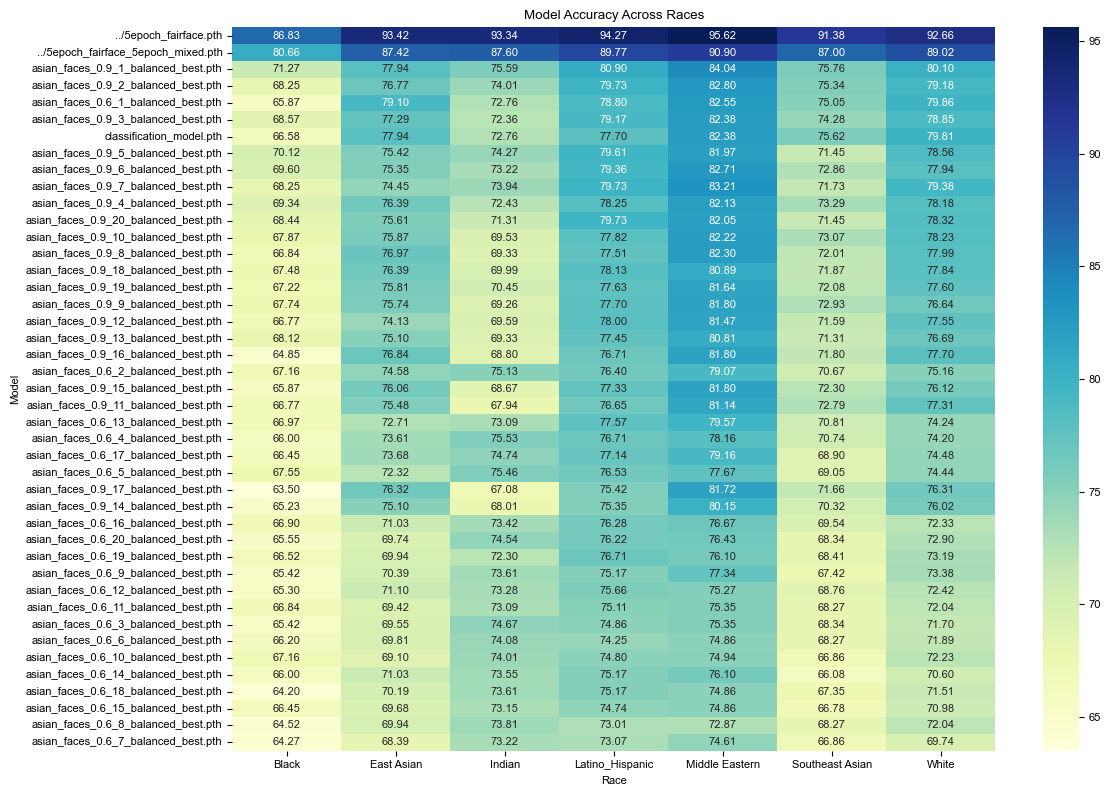

In [90]:
# 3. Heatmap of Model Performance Across Races
heatmap_data = df.pivot_table(index='Model', columns='Race', values='Accuracy', aggfunc='mean')
# order by accuracy
heatmap_data = heatmap_data.reindex(heatmap_data.mean(axis=1).sort_values(ascending=False).index)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Accuracy Across Races")
plt.xlabel("Race")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig('Accuracy_Model_Per_Race_Heatmap.png')
plt.show()
# save

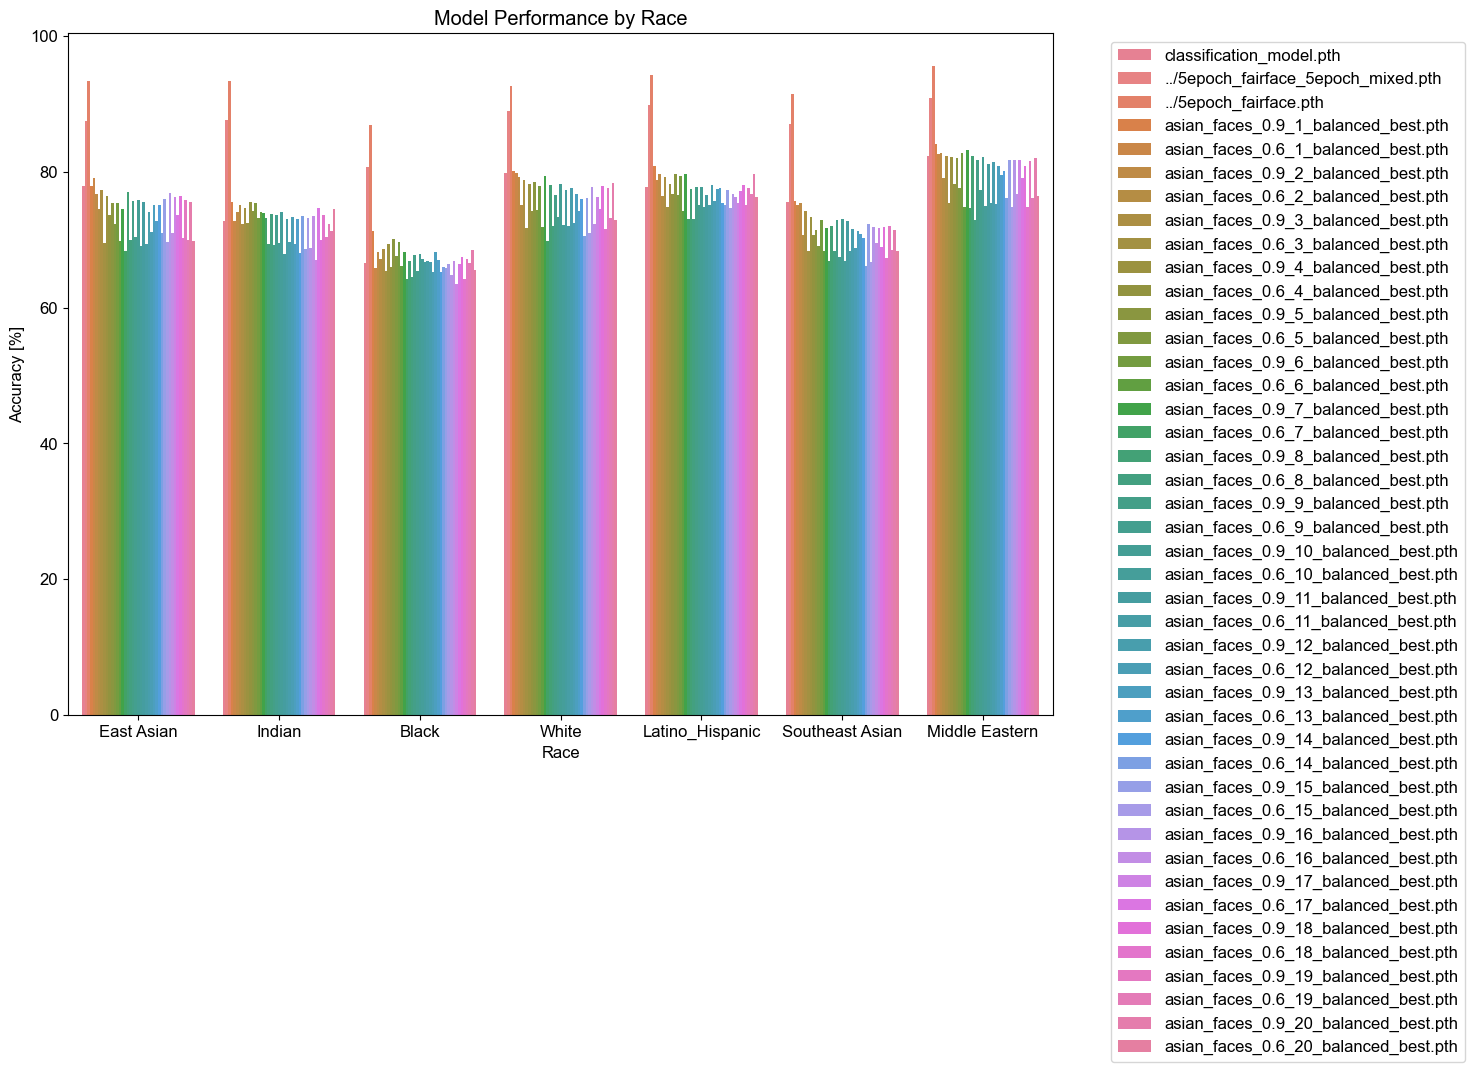

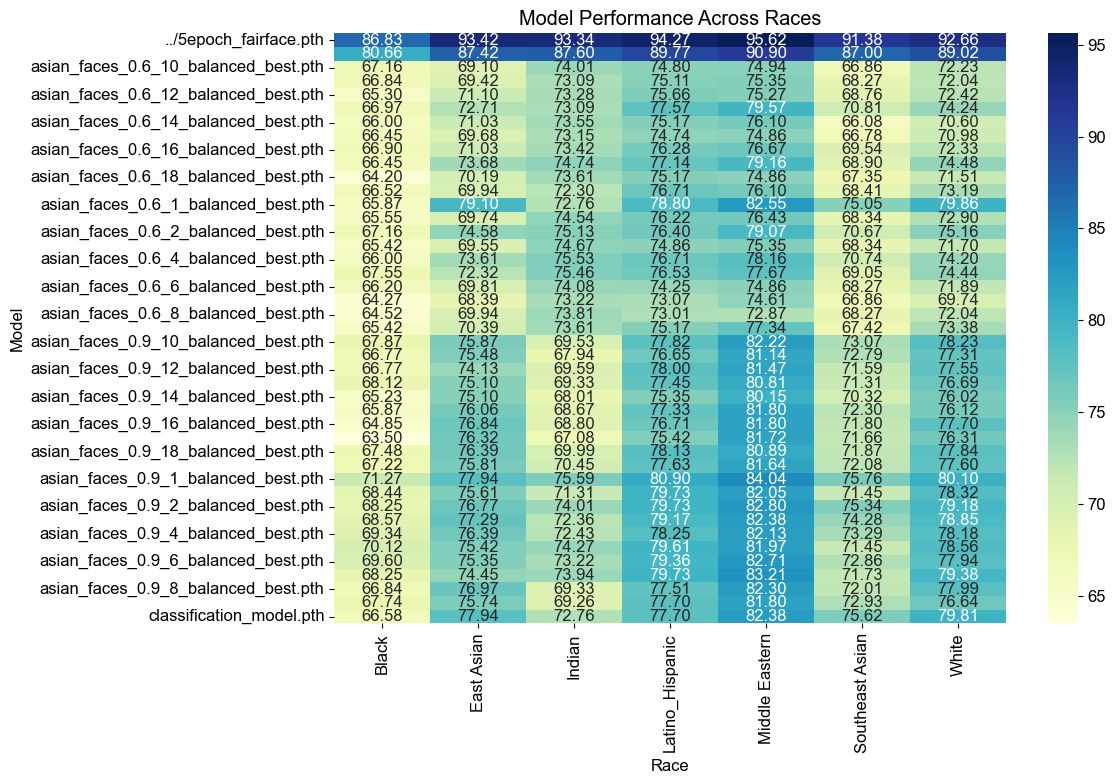

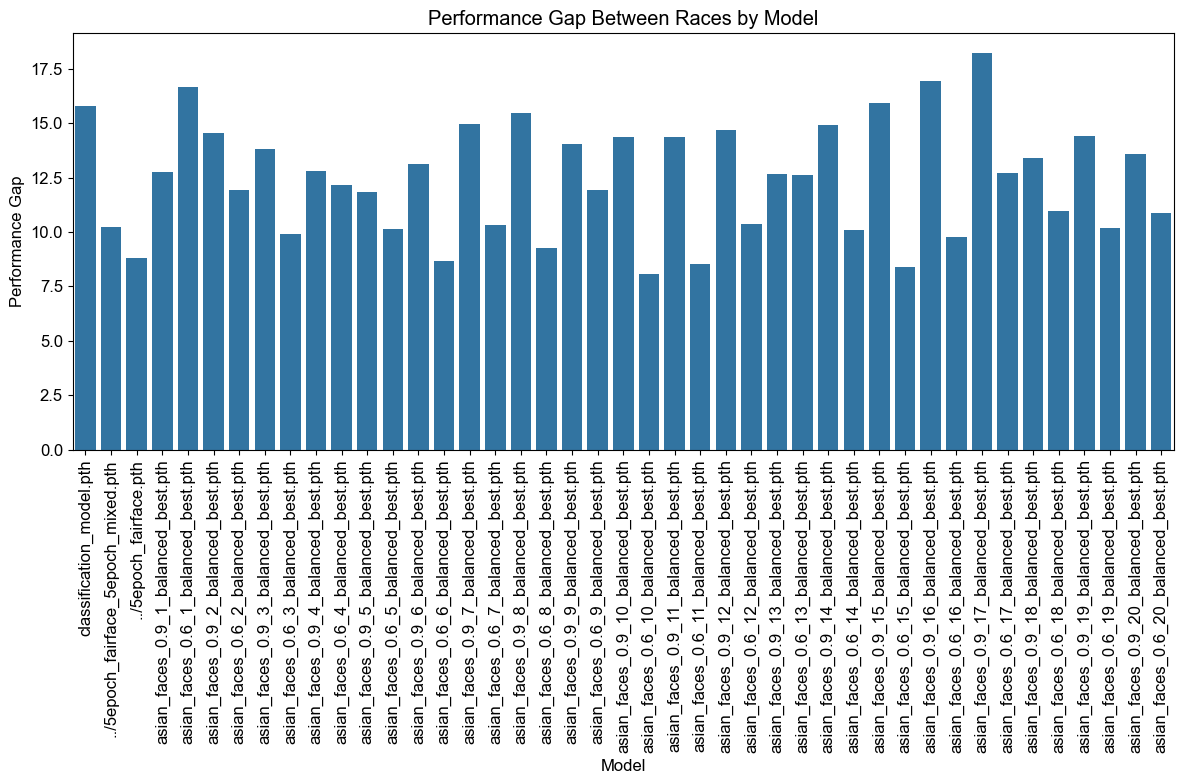

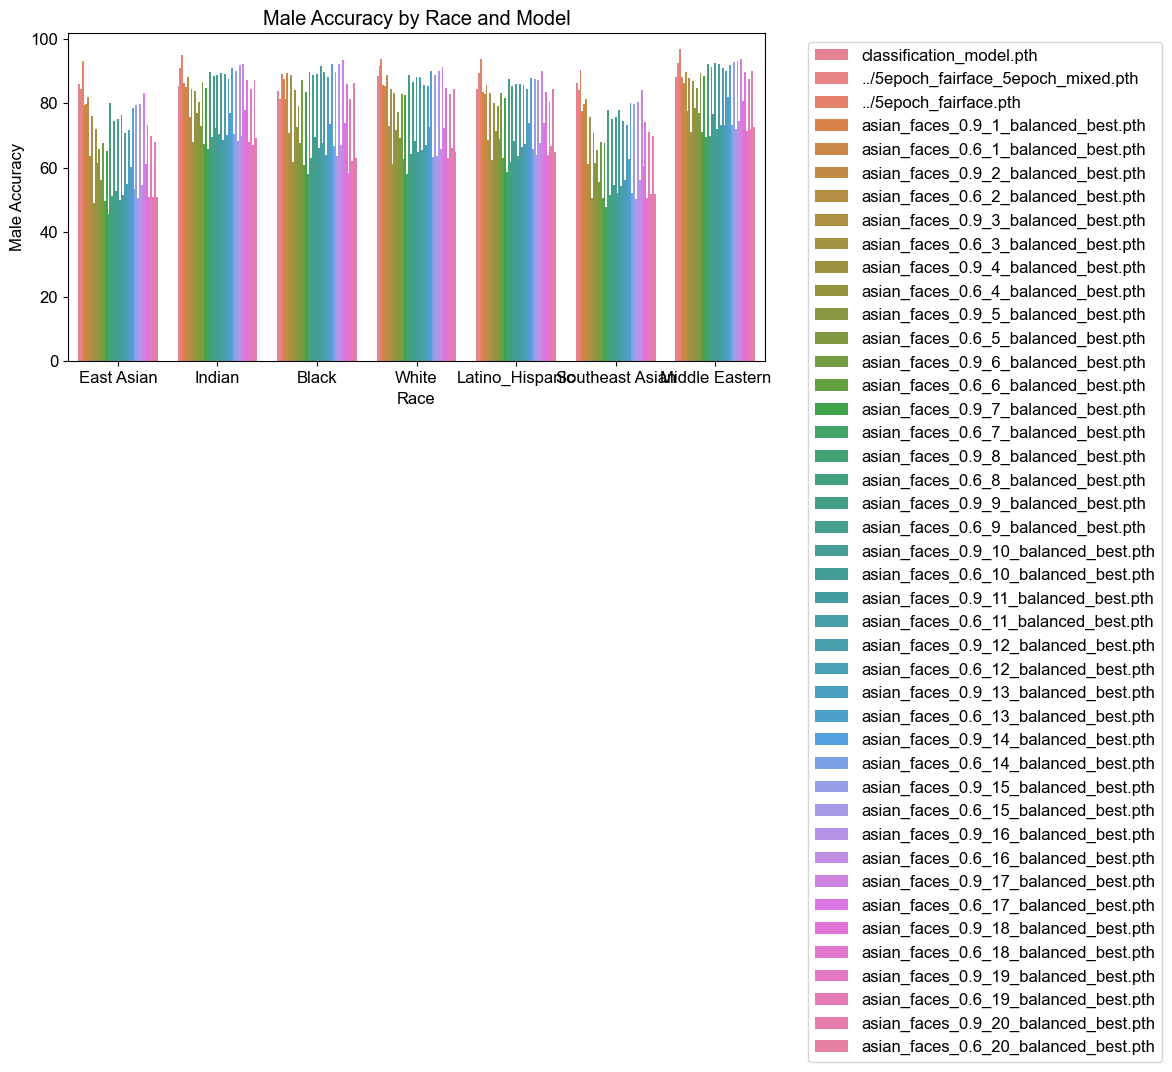

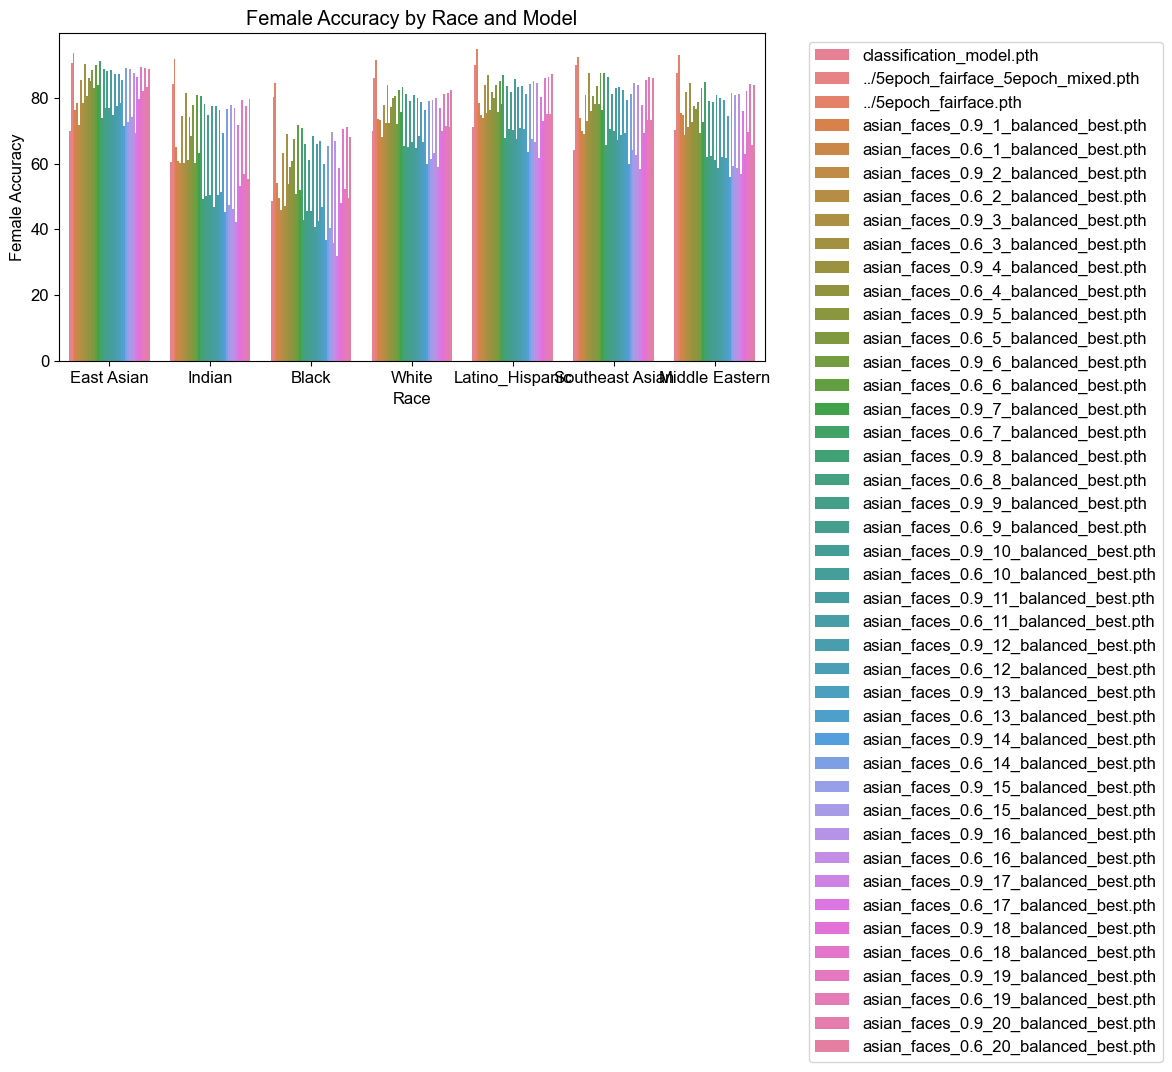

In [54]:
# 2. Model Performance by Race
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Race', y='Accuracy', hue='Model')
plt.title("Model Performance by Race")
plt.xlabel("Race")
plt.ylabel("Accuracy [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Heatmap of Model Performance Across Races
heatmap_data = df.pivot_table(index='Model', columns='Race', values='Accuracy', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Performance Across Races")
plt.xlabel("Race")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 4. Performance Gap Between Races
df['Performance Gap'] = df.groupby('Model')['Accuracy'].transform(lambda x: x.max() - x.min())
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Model', y='Performance Gap')
plt.title("Performance Gap Between Races by Model")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Gender-Specific Performance
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Race', y='Male Accuracy', hue='Model')
plt.title("Male Accuracy by Race and Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Race', y='Female Accuracy', hue='Model')
plt.title("Female Accuracy by Race and Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the results from FixMatch experiments
results_fix = pd.read_csv('../Controlled-Bias-Experiments/all_FixMatch_experiments_results.csv')
results_combined = results_fix

# Classify models as balanced or unbalanced based on their filenames
results_combined['Model Type'] = results_combined['Model'].apply(
    lambda x: 'Unbalanced' if '_unbalanced_' in x else ('Balanced' if '_balanced_' in x else 'Unknown')
)

# Filter out rows with 'Unknown' model type (if any)
results_combined = results_combined[results_combined['Model Type'] != 'Unknown']

# Calculate gender disparity (absolute difference between male and female accuracy)
results_combined['Gender Disparity'] = abs(results_combined['Male Accuracy'] - results_combined['Female Accuracy'])

# Initialize lists to store the best models
best_models = []

# Iterate over each dataset
for dataset in results_combined['Test Dataset'].unique():
    # Filter the results for the current dataset
    dataset_results = results_combined[results_combined['Test Dataset'] == dataset]
    
    # Iterate over each model folder within the dataset
    for model_folder in dataset_results['Model Folder'].unique():
        # Filter the results for the current model folder
        folder_results = dataset_results[dataset_results['Model Folder'] == model_folder]
        
        # Iterate over balanced and unbalanced models
        for model_type in ['Balanced', 'Unbalanced']:
            # Filter the results for the current model type
            type_results = folder_results[folder_results['Model Type'] == model_type]
            
            if not type_results.empty:
                # Find the model with the highest accuracy
                best_accuracy_row = type_results.loc[type_results['Accuracy'].idxmax()]
                best_models.append({
                    'Test Dataset': dataset,
                    'Model Folder': model_folder,
                    'Model Type': model_type,
                    'Best Metric': 'Accuracy',
                    'Model': best_accuracy_row['Model'],
                    'Accuracy': best_accuracy_row['Accuracy'],
                    'Male Accuracy': best_accuracy_row['Male Accuracy'],
                    'Female Accuracy': best_accuracy_row['Female Accuracy'],
                    'Gender Disparity': best_accuracy_row['Gender Disparity']
                })
                
                # Find the model with the lowest gender disparity
                best_disparity_row = type_results.loc[type_results['Gender Disparity'].idxmin()]
                best_models.append({
                    'Test Dataset': dataset,
                    'Model Folder': model_folder,
                    'Model Type': model_type,
                    'Best Metric': 'Gender Disparity',
                    'Model': best_disparity_row['Model'],
                    'Accuracy': best_disparity_row['Accuracy'],
                    'Male Accuracy': best_disparity_row['Male Accuracy'],
                    'Female Accuracy': best_disparity_row['Female Accuracy'],
                    'Gender Disparity': best_disparity_row['Gender Disparity']
                })

# Combine the results into a single DataFrame
best_models_df = pd.DataFrame(best_models)

# Save the results to a new CSV file
best_models_df.to_csv('best_fix_models_by_dataset_v2.csv', index=False)

print("Best models saved to 'best_fix_models_by_dataset.csv'")

Best models saved to 'best_fix_models_by_dataset.csv'


In [1]:
import pandas as pd

# Load the results from FixMatch and FlexMatch experiments
results_flex = pd.read_csv('../Controlled-Bias-Experiments/all_FlexMatch_experiments_results.csv')
results_combined = results_flex

# Classify models as balanced or unbalanced based on their filenames
results_combined['Model Type'] = results_combined['Model'].apply(
    lambda x: 'Unbalanced' if '_unbalanced_' in x else ('Balanced' if 'FlexMatch_' in x else 'Unknown')
)

# Filter out rows with 'Unknown' model type (if any)
results_combined = results_combined[results_combined['Model Type'] != 'Unknown']

# Calculate gender disparity (absolute difference between male and female accuracy)
results_combined['Gender Disparity'] = abs(results_combined['Male Accuracy'] - results_combined['Female Accuracy'])

# Initialize lists to store the best models
best_models = []

# Iterate over each dataset
for dataset in results_combined['Dataset'].unique():
    # Filter the results for the current dataset
    dataset_results = results_combined[results_combined['Dataset'] == dataset]
    
    # Iterate over each model folder within the dataset
    for model_folder in dataset_results['Model Folder'].unique():
        # Filter the results for the current model folder
        folder_results = dataset_results[dataset_results['Model Folder'] == model_folder]
        
        # Iterate over balanced and unbalanced models
        for model_type in ['Balanced', 'Unbalanced']:
            # Filter the results for the current model type
            type_results = folder_results[folder_results['Model Type'] == model_type]
            
            if not type_results.empty:
                # Find the model with the highest accuracy
                best_accuracy_row = type_results.loc[type_results['Accuracy'].idxmax()]
                best_models.append({
                    'Dataset': dataset,
                    'Model Folder': model_folder,
                    'Model Type': model_type,
                    'Best Metric': 'Accuracy',
                    'Model': best_accuracy_row['Model'],
                    'Accuracy': best_accuracy_row['Accuracy'],
                    'Male Accuracy': best_accuracy_row['Male Accuracy'],
                    'Female Accuracy': best_accuracy_row['Female Accuracy'],
                    'Gender Disparity': best_accuracy_row['Gender Disparity']
                })
                
                # Find the model with the lowest gender disparity
                best_disparity_row = type_results.loc[type_results['Gender Disparity'].idxmin()]
                best_models.append({
                    'Dataset': dataset,
                    'Model Folder': model_folder,
                    'Model Type': model_type,
                    'Best Metric': 'Gender Disparity',
                    'Model': best_disparity_row['Model'],
                    'Accuracy': best_disparity_row['Accuracy'],
                    'Male Accuracy': best_disparity_row['Male Accuracy'],
                    'Female Accuracy': best_disparity_row['Female Accuracy'],
                    'Gender Disparity': best_disparity_row['Gender Disparity']
                })

# Combine the results into a single DataFrame
best_models_df = pd.DataFrame(best_models)

# Save the results to a new CSV file
best_models_df.to_csv('best_flex_models_by_dataset.csv', index=False)

print("Best models saved to 'best_flex_models_by_dataset.csv'")

Best models saved to 'best_flex_models_by_dataset.csv'
